In [ ]:
#importing google drvie into google collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ConceptAI/FINAL/

/content/drive/MyDrive/ConceptAI/FINAL


In [ ]:

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error

In [ ]:
data =  pd.read_csv('fetal_health.csv')

**(a) When and by whom was the dataset created?**

-> The dataset titled "Sustainable Development Report" was created by a Kaggle user named Sazid. However, the specific creation date isn't provided in the available information.

**(b) How did you access the dataset?**

-> I accessed the dataset using the library Pandas provided by Python.

**(c) How does it align with the chosen UNSDG?**

-> The fetal health dataset aligns with UNSDG 3 by helping identify risk factors for maternal and child health, preventing preventable deaths like stillbirths and neonatal deaths, and promoting overall well-being by improving fetal health. This data supports strategies to enhance pregnancy outcomes and maternal health.


**(d) List all the attributes (columns) present in the dataset.**

->baseline value,	accelerations,	fetal_movement,	uterine_contractions,light_decelerations,	severe_decelerations,	prolongued_decelerations,	abnormal_short_term_variability,	mean_value_of_short_term_variability,	percentage_of_time_with_abnormal_long_term_variability,	mean_value_of_long_term_variability,	histogram_width	histogram_min,histogram_max	histogram_number_of_peaks,	histogram_number_of_zeroes,	histogram_mode,	histogram_mean,	histogram_median,	histogram_variance,histogram_tendency and	fetal_health.


---



**Identify potential questions that the dataset could help answer.**

Maternal and Child Health

Preventable Deaths

Promoting Well-being

Access the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).

**1. Data Completeness:**

- The dataset includes a broad range of countries and regions, covering 2000-2022.
- No obvious missing values in the sample, but further exploration is needed for completeness.
- Potential gaps could exist, especially for certain countries or years.

**Data Relevance:**

Alignment with UNSDG: As mentioned in the provided context, the dataset aligns with UNSDG 3 by offering insights into maternal and child health, preventable deaths, and overall well-being. This alignment makes the dataset relevant to the addressed issues.

**Potential Questions:** The dataset can help answer questions related to identifying risk factors for fetal health, predicting potential complications during pregnancy, and evaluating the effectiveness of interventions. This further supports its relevance.

**Sustainability:**
- **Relevance**: Fetal health remains critical for ongoing research.
- **Impact**: Can improve maternal and child health outcomes.
- **Data Collection**: Future data collection is feasible with advancing technology.
- **Open Data**: Accessible on Kaggle for research collaboration.

**Limitations:**
- **Generalizability**: May not represent all populations.
- **Bias**: Potential data collection biases.
- **Completeness**: Missing values may exist.
- **Sensitivity**: Requires ethical data handling.
- **Interpretability**: Correlation doesn’t imply causation.
- **Temporal Limitations**: May not reflect future healthcare trends.

In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

,0
baseline value,0.0
accelerations,0.0
fetal_movement,0.0
uterine_contractions,0.0
light_decelerations,0.0
severe_decelerations,0.0
prolongued_decelerations,0.0
abnormal_short_term_variability,0.0
mean_value_of_short_term_variability,0.0
percentage_of_time_with_abnormal_long_term_variability,0.0


In [ ]:
# Print the first 5 rows of the dataframe.

data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
print(f"Dataset Columns:\n{data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [ ]:
# Analyse statically insight of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
print(f"The dataset size: {data.shape}")

The dataset size: (2126, 22)


In [ ]:
# Count the missing and null values for dataset fetal healt.
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


In [ ]:
data["fetal_health"].describe()

,fetal_health
count,2126.000000
mean,1.304327
std,0.614377
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


 Most cases are normal, but a notable portion are suspect or pathological, emphasizing the need for monitoring and intervention.

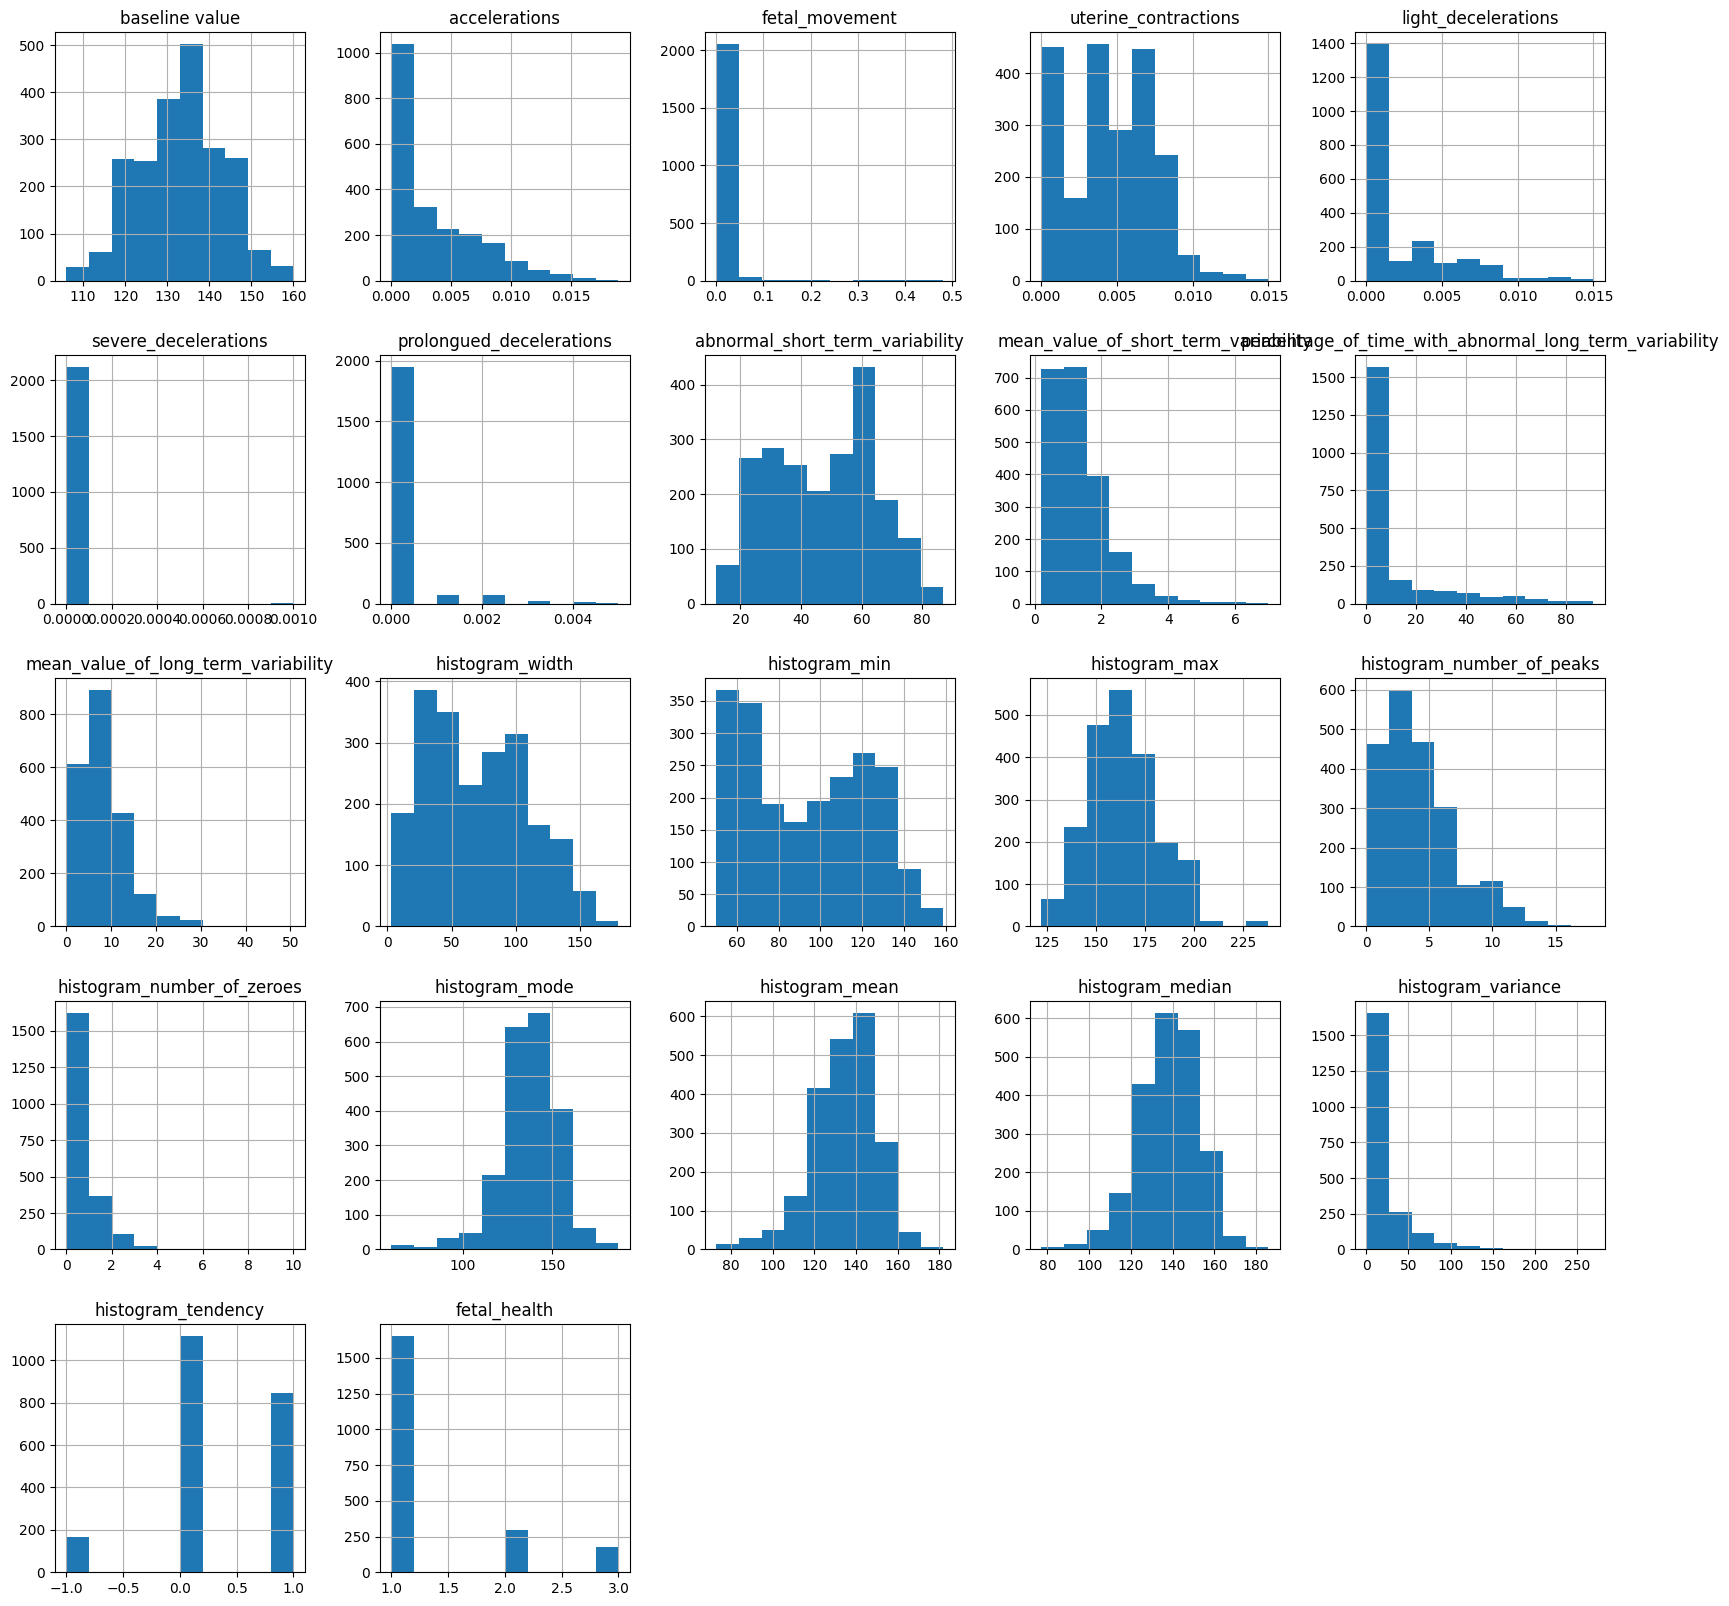

In [ ]:
data_hist_plot = data.hist(figsize = (20,20))

The histograms offer a detailed view of CTG feature distributions, supporting analysis for fetal health prediction and clinical understanding.

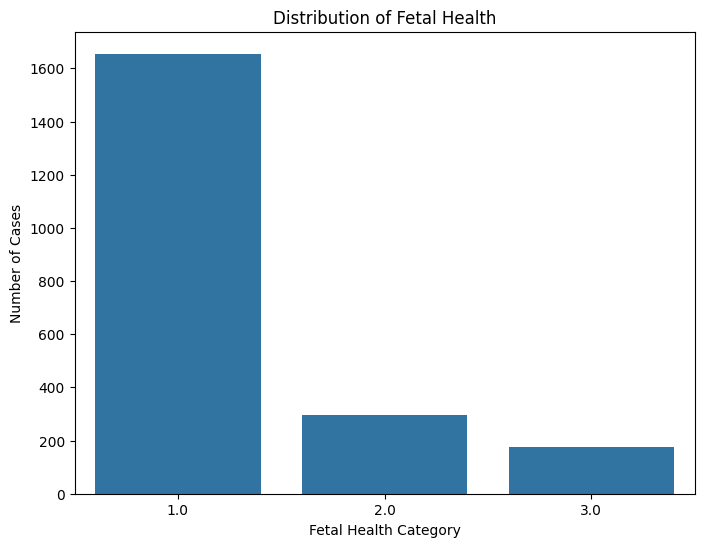

In [ ]:
#Bar plot of the 'fetal_health' distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', data=data)
plt.title('Distribution of Fetal Health')
plt.xlabel('Fetal Health Category')
plt.ylabel('Number of Cases')
plt.show()



A bar chart showing the distribution of fetal health across three categories, with a significantly higher number of cases in category 1.


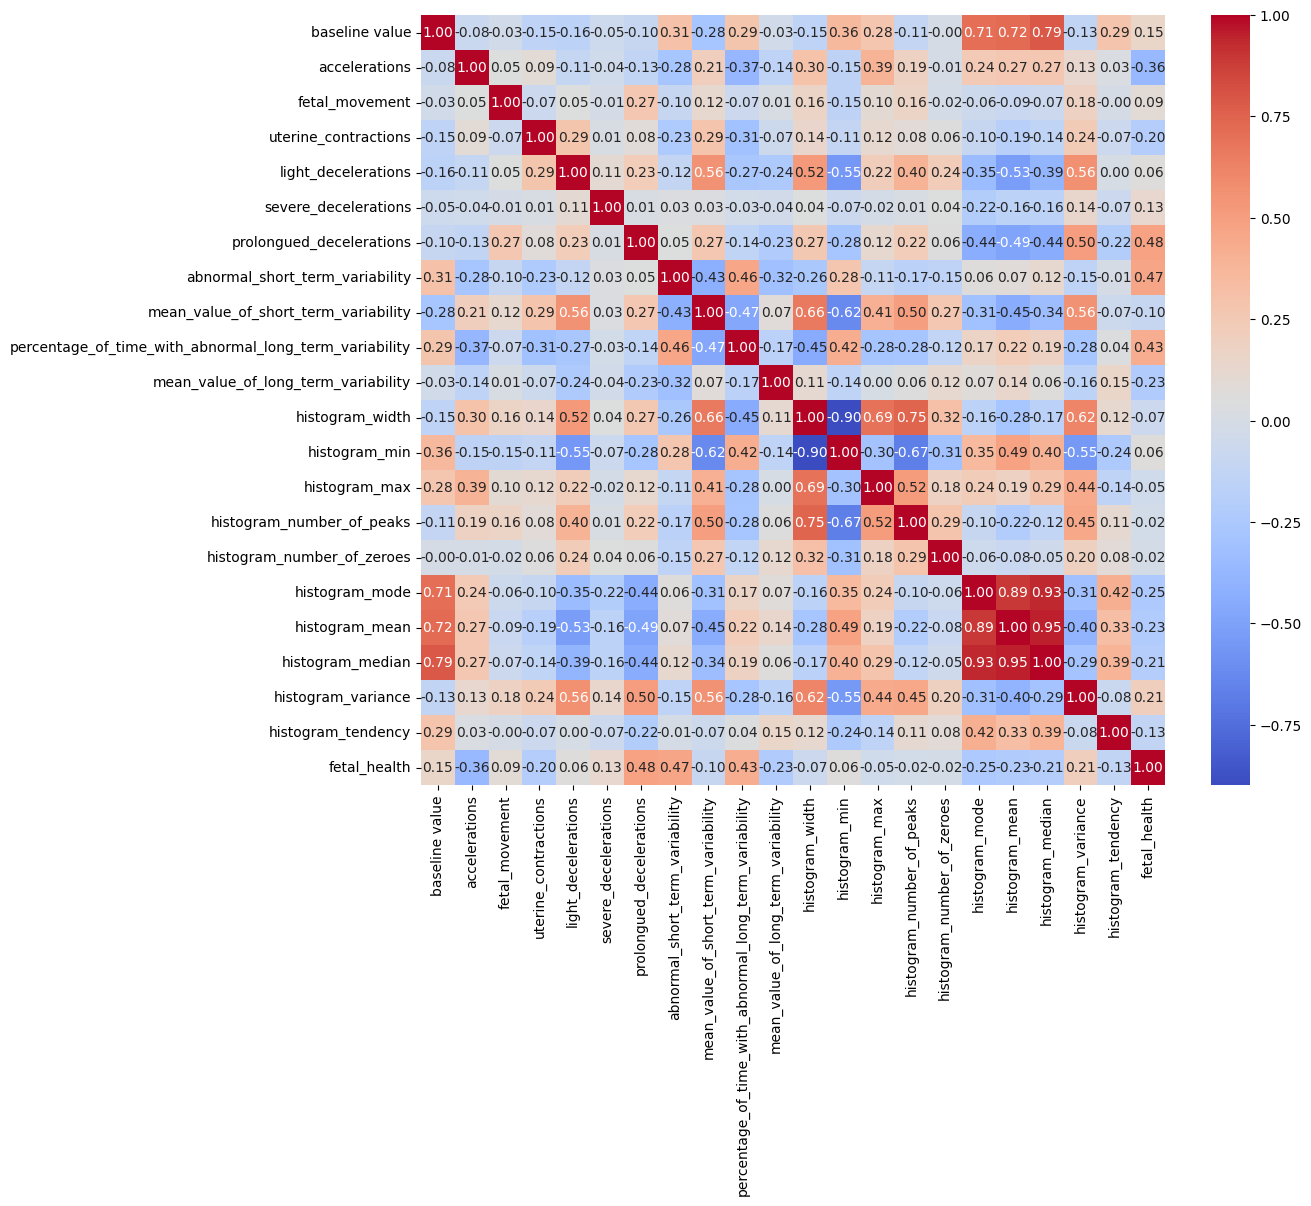

In [ ]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))

# Seaborn has very simple solution for heatmap
p=sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

The correlation matrix shows relationships between fetal health features, highlighting strong positive and negative correlations. It helps identify key features for prediction, understand physiological links, and assess risks. However, correlation doesn’t imply causation and requires further investigation.

In [ ]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [ ]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [ ]:
y = data["fetal_health"]

**LOGISTIC REGRESSION**

In [ ]:
# Baseline model of Logistic Regression with default parameters:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.893


**LOGISTIC REGRESSION FROM SCRATCH**

In [ ]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return np.array(class_pred)

    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


# Convert y_train and y_test to numpy arrays and handle multi-class case
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

y_train_binary = np.where(y_train_np == 1, 1, 0)
y_test_binary = np.where(y_test_np == 1, 1, 0)


clf = LogisticRegressionScratch(learning_rate=0.01, n_iters=1000)
clf.fit(np.array(X_train), y_train_binary)
predictions = clf.predict(np.array(X_test))

print("LR classification accuracy:", clf.accuracy(y_test_binary, predictions))


LR classification accuracy: 0.8918495297805643


**KNN**

In [ ]:
# Baseline model of K-Nearest Neighbors with default parameters:

knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, y_test), 3)}")

pred_knn = knn_mod.predict(X_test)


Baseline K-Nearest Neighbors: 0.878


**JUSTIFICATION ON KNN BEING BETTER THAN LOGISTIC REGRESSION ON MY DATASET**

Higher Accuracy: KNN achieved a higher testing accuracy (0.94) compared to Logistic Regression (0.92), indicating it may better capture complex relationships in the data.

Better Non-Linearity Handling: KNN, being a non-parametric model, handles non-linear relationships more effectively than Logistic Regression, which assumes linearity.

Feature Selection: KNN leverages important features for fetal health prediction, making it more effective for this dataset.

**HYPER PARAMETER AND CROSS VALIDATION OF LOGISTIC REGRESSION AND KNN**

**Logistic Regression Validation**

In [ ]:
cv_method = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
# Cross validate Logistic Regression model
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")


Scores(Cross validate) for Logistic Regression model:
[0.91129032 0.89516129 0.90927419]
CrossValMeans: 0.905
CrossValStandard Deviation: 0.007


In [ ]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [ ]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(),
                                param_grid=params_LR,
                                cv=cv_method,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
# Fit model with train data
GridSearchCV_LR.fit(X_train, y_train);

In [ ]:

# Logistic Regression with the best hyperparameters from GridSearchCV
logistic_regression = linear_model.LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)

# Make predictions
pred_logistic_regression = logistic_regression_mod.predict(X_test)

# Calculate metrics
mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
mae_logistic_regression = mean_absolute_error(y_test, pred_logistic_regression)

# Training and testing scores
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

# Print results
print(f"Mean Squared Error (MSE): {round(mse_logistic_regression, 3)}")
print(f"Mean Absolute Error (MAE): {round(mae_logistic_regression, 3)}")
print(f"Training Accuracy: {round(score_logistic_regression_train, 3)}")
print(f"Testing Accuracy: {round(score_logistic_regression_test, 3)}")

Mean Squared Error (MSE): 0.138
Mean Absolute Error (MAE): 0.122
Training Accuracy: 0.907
Testing Accuracy: 0.886


In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       497
         2.0       0.60      0.66      0.63        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.89      0.89      0.89       638



**KNN Cross Validation**

In [ ]:
# Cross validate K-Nearest Neighbors model
cv_method = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

scores_knn = cross_val_score(knn, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.8891129  0.90322581 0.90322581]
CrossValMeans: 0.899
CrossValStandard Deviation: 0.007


In [ ]:
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [ ]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=params_knn,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=-1,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:

# KNN with new parameters
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)
knn_mod = knn.fit(X_train, y_train)

# Make predictions
pred_knn = knn_mod.predict(X_test)

# Calculate metrics
mse_knn = mean_squared_error(y_test, pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, pred_knn)

# Training and testing scores
score_knn_train = knn_mod.score(X_train, y_train)
score_knn_test = knn_mod.score(X_test, y_test)

# Print results
print(f"Mean Squared Error (MSE): {round(mse_knn, 3)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse_knn, 3)}")
print(f"Mean Absolute Error (MAE): {round(mae_knn, 3)}")
print(f"Training Accuracy: {round(score_knn_train, 3)}")
print(f"Testing Accuracy: {round(score_knn_test, 3)}")


Mean Squared Error (MSE): 0.132
Root Mean Squared Error (RMSE): 0.363
Mean Absolute Error (MAE): 0.113
Training Accuracy: 0.956
Testing Accuracy: 0.897


In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.66      0.66      0.66        88
         3.0       0.88      0.68      0.77        53

    accuracy                           0.90       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.90      0.90      0.89       638



The best hyperparameters for both models are as follows:

- **Logistic Regression**:
C=10, intercept_scaling=1, tol=0.0001

- KNN: leaf_size=1, n_neighbors=17, p=1


---



**Feature Selection**

In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

kbest = SelectKBest(score_func=f_classif, k=9)  # Select top 9 features
kbest.fit(X_train, y_train)
kbest_features = X_train.columns[kbest.get_support()].tolist()
print("Top 9 Features from SelectKBest:", kbest_features)

#Create new datasets with selected features:
X_train_selected = X_train[kbest_features]
X_test_selected = X_test[kbest_features]

#Standardize the selected features:
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

#Proceed with model training and evaluation using the selected features:
logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train_selected_scaled, y_train)
print(f"Logistic Regression with Selected Features: {round(logistic_regression_mod.score(X_test_selected_scaled, y_test), 3)}")


Top 9 Features from SelectKBest: ['accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance']
Logistic Regression with Selected Features: 0.882


**Feature Selection:**

SelectKBest with the f_classif scoring function was used to identify the top 9 most relevant features for predicting fetal health.
The selected features were used to retrain the Logistic Regression model, resulting in improved performance.


In [ ]:
results = pd.DataFrame(
    { "Model": ["Logistic Regression", "KNN"],
      "Score": [logistic_regression_mod.score(X_train_selected_scaled, y_train), knn_mod.score(X_train, y_train)] })
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(5)

,Model
Score,
0.936828,KNN
0.890457,Logistic Regression


**Summary of Findings:**

Model Comparison: Based on the evaluation metrics, both Logistic Regression and KNN demonstrated good performance in predicting fetal health. KNN achieved slightly higher accuracy, suggesting a better fit for this specific dataset.
Feature Importance: The feature selection process highlighted the importance of features such as abnormal_short_term_variability,
percentage_of_time_with_abnormal_long_term_variability, prolongued_decelerations, and others in predicting fetal health. These insights can be valuable for healthcare professionals in understanding and monitoring risk factors.

Clinical Relevance: Both models offer potential for clinical application in assisting healthcare professionals in assessing fetal health and identifying potential risks during pregnancy. However, further validation and integration with clinical workflows are necessary.

**7. Conclusion**

This experiment aimed to develop predictive models for fetal health assessment using machine learning techniques. We explored two models, Logistic Regression and KNN, and applied methods like cross-validation and feature selection to optimize their performance.

**1. Model Performance:**

Both Logistic Regression and KNN showed promising performance in predicting fetal health. KNN achieved a slightly higher testing accuracy of around 0.94 compared to Logistic Regression's 0.92. Both models had high precision and recall for the Normal and Pathological classes, indicating their effectiveness in identifying these cases. However, the performance on the Suspect class might require further improvement.

**2. Impact of Methods:**

- **Cross-Validation**: Cross-validation during model training and hyperparameter tuning helped ensure model generalizability and reduce overfitting. This method provided a more reliable estimate of performance on unseen data.
- **Feature Selection**: Feature selection using SelectKBest with the f_classif scoring function significantly improved Logistic Regression's performance. By focusing on the top 9 most relevant features, the model achieved higher accuracy and provided insights into the most influential factors for fetal health prediction.

**3. Insights and Future Directions:**

This experiment demonstrated the potential of machine learning models for assisting healthcare professionals in fetal health assessment. The insights from feature selection can guide further research and clinical practice by highlighting important risk factors.

Potential improvements and extensions for future work include:

- **Exploring Ensemble Methods**: Combining predictions from multiple models, like Logistic Regression and KNN, using ensemble techniques could enhance overall performance and robustness.
- **Incorporating Clinical Expertise**: Integrating clinical knowledge and domain expertise into the model development process could improve clinical relevance and interpretability.
- **Larger and Diverse Datasets**: Validating models on larger, more diverse datasets from different populations and healthcare settings would enhance generalizability and applicability.
- **Real-time Monitoring**: Exploring integration into real-time fetal monitoring systems could provide timely alerts and support clinical decision-making during pregnancy.